https://www.kaggle.com/c/titanic-gettingStarted

In [53]:
import pandas as pd
from pandas import Series,DataFrame

In [54]:
titanic_df=pd.read_csv("titanic_train.csv")
titanic_df.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
titanic_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Then we'll dig deeper, with a broader question:  
  __What factors helped someone survive the sinking?__

So let's start with the first question: Who were the passengers on the titanic?

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

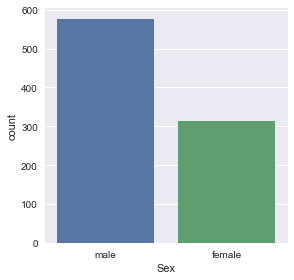

In [57]:
# Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
sns.factorplot("Sex", data=titanic_df,kind="count")

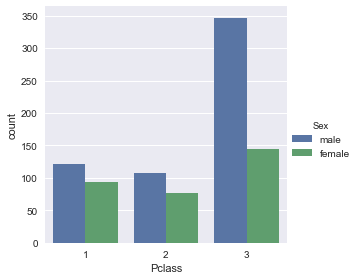

In [58]:
sns.factorplot("Pclass", data=titanic_df,hue="Sex", kind="count")  

In [59]:
# split data into child, male and female
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

In [60]:
titanic_df["person"] =titanic_df[["Age","Sex"]].apply(male_female_child,axis=1)
titanic_df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


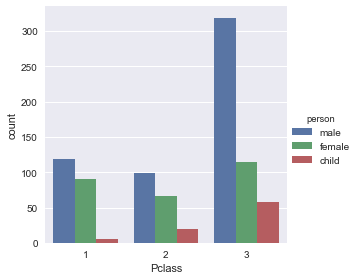

In [61]:
sns.factorplot("Pclass",data=titanic_df,hue="person", kind="count")

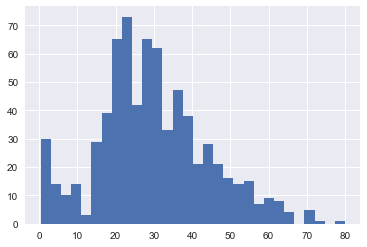

In [62]:
titanic_df['Age'].hist(bins=30)

In [63]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


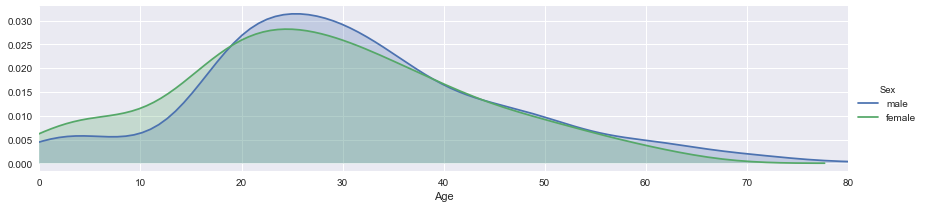

In [64]:
fig = sns.FacetGrid(titanic_df,hue="Sex",aspect=4)
fig.map(sns.kdeplot, "Age",shade=True)
oldest= titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


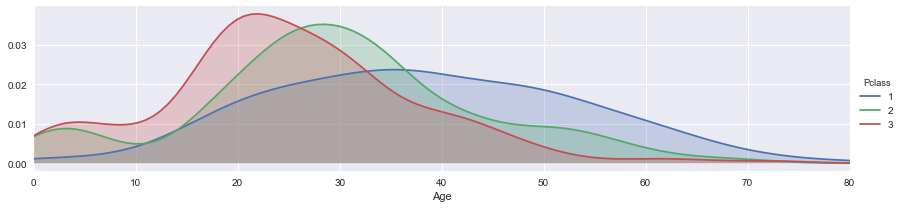

In [65]:
fig=sns.FacetGrid(titanic_df,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class.  
So let's move on to our 2nd question: __What deck were the passengers on and how does that relate to their class?__


In [66]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [67]:
# First we'll drop the NaN values and create a new object, deck
deck=titanic_df["Cabin"].dropna()

In [68]:
deck.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [69]:
# Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels)
cabin_df.colums=["Cabin"]
sns.factorplot('Cabin',data=cabin_df,palette="winter_d",kind="count")

ValueError: Could not interpret input 'Cabin'

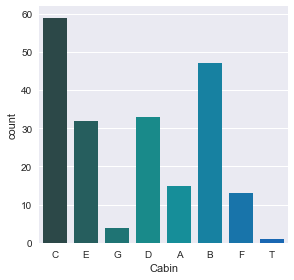

In [70]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot("Cabin",data=cabin_df,kind="count", palette="winter_d") # palette specifies colour

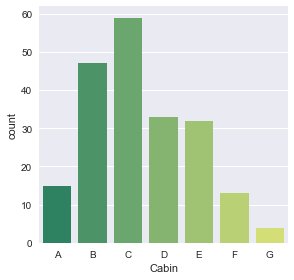

In [71]:
# T doesnt make sence
cabin_df= cabin_df[cabin_df.Cabin !='T']
sns.factorplot("Cabin",data=cabin_df,kind="count",palette="summer",order=['A','B','C','D','E','F','G'])


Quick note: I used `winter_d` and `summer` as my palettes, but you can choose any palette you want. Check out this link for more palette names, you can add '_d' to the end of any palette name to make it darker.

Link: http://matplotlib.org/users/colormaps.html

In [72]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


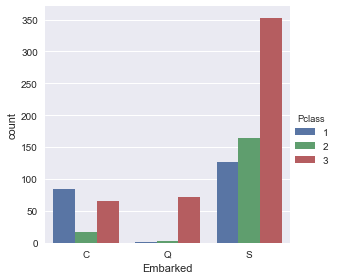

In [73]:
sns.factorplot("Embarked",data=titanic_df,kind="count",hue="Pclass",order=['C','Q','S'])

Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:  
__Where did the passengers come from?__  
-> SibSp for nr of siblings  a passenger has on board, ParCh for parents/children

In [74]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [75]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] ='with Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link  
http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning

In [76]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


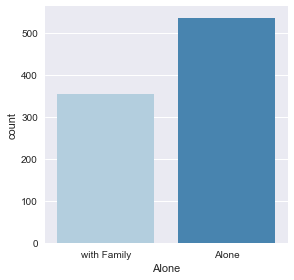

In [77]:
sns.factorplot('Alone',data=titanic_df,palette="Blues",kind="count")

Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question:  
__What factors helped someone survive the sinking?__

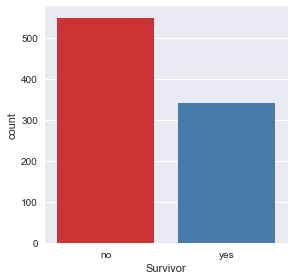

In [80]:
titanic_df['Survivor'] =titanic_df.Survived.map({0:'no',1:'yes'})
sns.factorplot('Survivor',data=titanic_df,kind="count",palette='Set1')

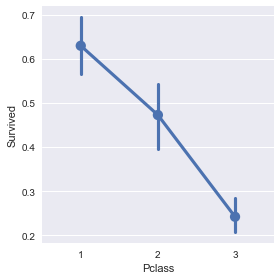

In [81]:
sns.factorplot('Pclass','Survived',data=titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy.

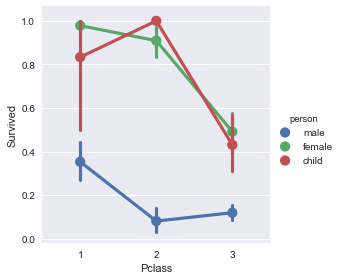

In [82]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

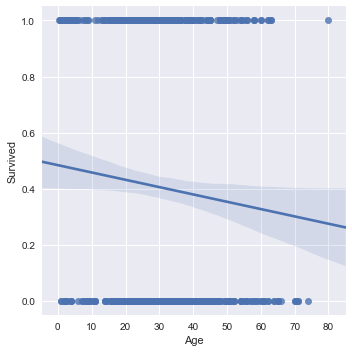

In [83]:
# check if age affects the chance of survival
sns.lmplot(x="Age",y='Survived',data=titanic_df)

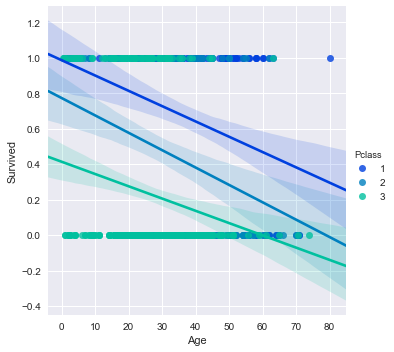

In [84]:
sns.lmplot(x="Age",y='Survived',data=titanic_df,hue="Pclass",palette="winter")

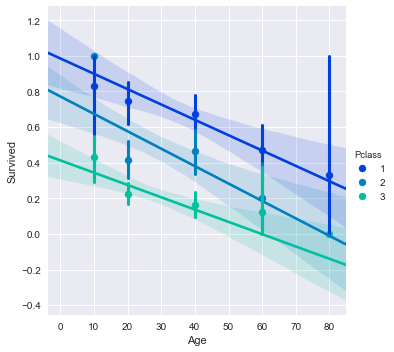

In [87]:
# use `xbin` argument to clean up the figure
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette="winter",x_bins=[10,20,40,60,80])

high standard diviation on the older 1st class passengers 
--> check the relations of gender and age with survival

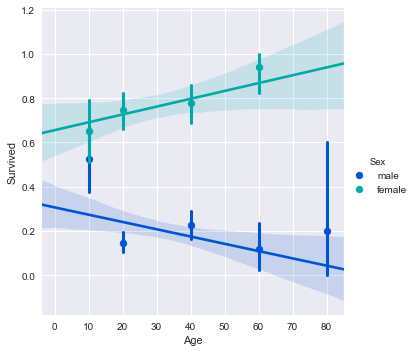

In [88]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=[10,20,40,60,80])